# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [17]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

mkdir: cannot create directory ‘dataroot’: File exists
--2020-11-25 13:57:26--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.1’

data_1.zip.1        100%[===================>]  30.59M  73.0MB/s    in 0.4s    

2020-11-25 13:57:27 (73.0 MB/s) - ‘dataroot/data_1.zip.1’ saved [32074743/32074743]

--2020-11-25 13:57:27--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.gith

In [18]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [19]:
# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [20]:
# Load images
import pickle
signimages = pickle.load( open( dataroot+"train.p", "rb" ) )

The image shows a Turn left ahead sign


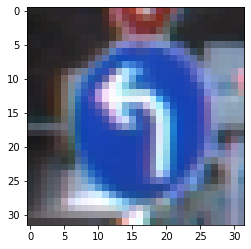

In [21]:
# Preview image
import matplotlib.pyplot as plt
import numpy as np
import cv2

inx = 20123
plt.imshow(signimages['features'][inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

In [22]:
signimages['sizes'][inx+1]

array([38, 41], dtype=uint8)

In [23]:

signimages.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [24]:
signimages['coords'][inx+1]

array([ 6,  6, 33, 36], dtype=uint8)

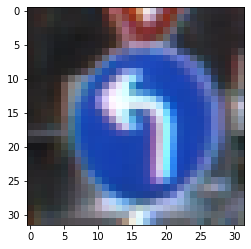

In [25]:
plt.imshow(signimages['features'][inx+1])

## HOG
Voy a utilizar el histograma de gradientes orientados para obtener las características de las imagenes guardadas en 'features'.

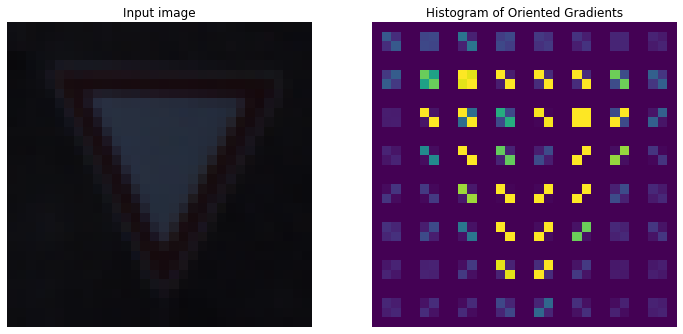

In [26]:

from skimage.feature import hog
from skimage import data, exposure


image = signimages['features'][23000]

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4,4),
                    cells_per_block=(2,2), visualize=True, block_norm= 'L2')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## HOG + SVM
En primer lugar aplico HOG a todas las imágenes del train, luego entreno un clasificador SVM.

In [27]:
signimages = pickle.load( open( dataroot+"train.p", "rb" ) )
data_train= signimages['features']
target_train= signimages['labels']

rows= data_train.shape[0]
data_hog= np.zeros((rows,32,32))
data_hog_flat= np.zeros((rows,32*32))


for i in range(rows):
  image= data_train[i]
  fd, data_hog[i] = hog(image, orientations=8, pixels_per_cell=(4,4),
                    cells_per_block=(2, 2), visualize=True,  block_norm= 'L2')
  data_hog_flat[i]= data_hog[i].flatten()  

data_hog_flat.shape

(34799, 1024)

In [28]:
y_train = np.array(target_train)
X_train = data_hog_flat

## Clasificación

In [29]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testeo

In [30]:
signimages_test = pickle.load( open( dataroot+"test.p", "rb" ) )
data_test= np.array(signimages_test['features'])

In [31]:
data_test= signimages_test['features']
target_test= signimages_test['labels']
rows= data_test.shape[0]
# rows= 1000
data_hog_test= np.zeros((rows,32,32))
data_hog_flat_test= np.zeros((rows,32*32))

for i in range(rows):
  image= data_test[i]
  fd, data_hog_test[i] = hog(image, orientations=8, pixels_per_cell=(4,4),
                    cells_per_block=(2, 2), visualize=True,  block_norm= 'L2')
  data_hog_flat_test[i]= data_hog_test[i].flatten() 


In [32]:
y_test = np.array(target_test)
X_test = data_hog_flat_test

In [33]:
from sklearn import metrics
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7241488519398258


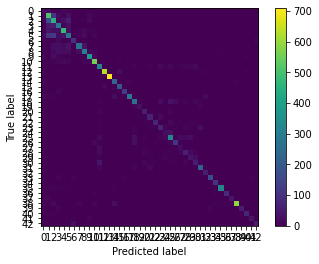

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, include_values= False)  # doctest: +SKIP
plt.show()  # doctest: +SKIP